In [1]:
import os 
import pickle
import numpy as np
import pandas as pd 
from glob import glob 
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import mahalanobis

import seaborn as sns

In [2]:
def dtw_distance(x, y, dist='euclidean'):
    m, n = len(x), len(y)
    dtw = np.zeros((m+1, n+1))
    
    # Initialize the first row and column of the DTW matrix
    for i in range(1, m+1):
        dtw[i, 0] = float('inf')
    for j in range(1, n+1):
        dtw[0, j] = float('inf')
    dtw[0, 0] = 0
    
    # Compute the DTW matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            if dist == 'euclidean':
              cost = euclidean_distance(x[i-1], y[j-1])  # Distance measure between elements x[i-1] and y[j-1]
            if dist == 'mahalanobis':
              cost = mahalanobis_distance(x[i-1], y[j-1])
            dtw[i, j] = cost + min(dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1])
    
    return dtw[m, n]

def euclidean_distance(a, b):
    # Calculate the distance between two elements a and b
    # Modify this function to use an appropriate distance measure for your multivariate time series
    
    # For example, Euclidean distance can be used as follows:
    return np.linalg.norm(a - b)
    
    # Alternatively, you can use other distance measures like Manhattan distance or cosine similarity
    # pass

def mahalanobis_distance(a, b):
    # Calculate the Mahalanobis distance between two elements a and b
    # cov is the covariance matrix
    # cov = np.array([[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],])
    
    cov = np.array([[1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,]])
    # Calculate the Mahalanobis distance using the scipy.spatial.distance.mahalanobis function
    return mahalanobis(a, b, cov)




---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_root = '/content/drive/MyDrive/22_FYP42 - Zero-shot Explainable HAR/epoch_vids/CKIM/MHEALTH/5 28 11 - Test1/'

In [5]:
with open(f"{data_root}skeleton_label_predictions.pickle", 'rb') as handle:
    pred_skeleton_data = pickle.load(handle)

In [6]:
with open(f"{data_root}skeleton_original_seq.pickle", 'rb') as handle:
    origin_skeleton_data = pickle.load(handle)

In [7]:
_, _, files = next(os.walk(f"{data_root}/videos"))

In [8]:
pred_files, target_files = {}, {}
for f in files:
  id = int(f.split('_')[1])
  if f[-17:] == 'original_skel.mp4':
    target_files[id] = f
  else:
    pred_files[id] = f.split('_m_')[1].split('_')[0]


---

In [9]:
pred_df = pd.DataFrame().from_records(pred_skeleton_data['label'])
pred_df.head()

,id,target,prediction
0,0,Climbing stairs,Climbing stairs
1,1,Climbing stairs,Climbing stairs
2,2,Cycling,Climbing stairs
3,3,Climbing stairs,Climbing stairs
4,4,Cycling,Climbing stairs


In [10]:
# pred_df['matching'] = pred_df['id'].map(pred_files)
# pred_df.head()

---

In [11]:
# MHEALTH 
super_dict = {
    'Static activities': ['Standing still', 'Sitting and relaxing', 'Lying down'],
    'Walking activities': ['Walking', 'Climbing stairs', 'Jogging', 'Running'],
    'Sports': ['Waist bends forward', 'Frontal elevation of arms' , 'Knees bending (crouching)', 'Cycling', 'Jump front & back']
}


---

In [12]:
super_class = {}
for i,j in super_dict.items():
    for c in j:
        super_class[c] = i 

In [13]:
super_class

{'Standing still': 'Static activities',
 'Sitting and relaxing': 'Static activities',
 'Lying down': 'Static activities',
 'Walking': 'Walking activities',
 'Climbing stairs': 'Walking activities',
 'Jogging': 'Walking activities',
 'Running': 'Walking activities',
 'Waist bends forward': 'Sports',
 'Frontal elevation of arms': 'Sports',
 'Knees bending (crouching)': 'Sports',
 'Cycling': 'Sports',
 'Jump front & back': 'Sports'}

---

In [14]:
def match_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = cs[np.argmin(np.array(dists))]
  return matching_class

In [15]:
pred_df['matching'] = pred_df.apply(lambda r: match_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching
0,0,Climbing stairs,Climbing stairs,Knees bending (crouching)
1,1,Climbing stairs,Climbing stairs,Knees bending (crouching)
2,2,Cycling,Climbing stairs,Knees bending (crouching)
3,3,Climbing stairs,Climbing stairs,Walking
4,4,Cycling,Climbing stairs,Knees bending (crouching)


In [17]:
def score_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = np.min(np.array(dists))
  return matching_class

In [18]:
pred_df['matching_dtw_dist'] = pred_df.apply(lambda r: score_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist
0,0,Climbing stairs,Climbing stairs,Knees bending (crouching),4.830773
1,1,Climbing stairs,Climbing stairs,Knees bending (crouching),5.319714
2,2,Cycling,Climbing stairs,Knees bending (crouching),6.858545
3,3,Climbing stairs,Climbing stairs,Walking,2.094390
4,4,Cycling,Climbing stairs,Knees bending (crouching),5.550426


---

In [19]:
pred_df['super_target'] = pred_df['target'].map(super_class)
pred_df['super_prediction'] = pred_df['prediction'].map(super_class)
pred_df['super_matching'] = pred_df['matching'].map(super_class)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching
0,0,Climbing stairs,Climbing stairs,Knees bending (crouching),4.830773,Walking activities,Walking activities,Sports
1,1,Climbing stairs,Climbing stairs,Knees bending (crouching),5.319714,Walking activities,Walking activities,Sports
2,2,Cycling,Climbing stairs,Knees bending (crouching),6.858545,Sports,Walking activities,Sports
3,3,Climbing stairs,Climbing stairs,Walking,2.094390,Walking activities,Walking activities,Walking activities
4,4,Cycling,Climbing stairs,Knees bending (crouching),5.550426,Sports,Walking activities,Sports


In [20]:
pred_df['correct'] = (pred_df['target'] == pred_df['prediction']).astype(int)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct
0,0,Climbing stairs,Climbing stairs,Knees bending (crouching),4.830773,Walking activities,Walking activities,Sports,1
1,1,Climbing stairs,Climbing stairs,Knees bending (crouching),5.319714,Walking activities,Walking activities,Sports,1
2,2,Cycling,Climbing stairs,Knees bending (crouching),6.858545,Sports,Walking activities,Sports,0
3,3,Climbing stairs,Climbing stairs,Walking,2.094390,Walking activities,Walking activities,Walking activities,1
4,4,Cycling,Climbing stairs,Knees bending (crouching),5.550426,Sports,Walking activities,Sports,0


In [24]:
# super class accuracy 
correct_df = pred_df.loc[pred_df['correct'] == 1, :]
print(accuracy_score(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching']))
print(classification_report(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching'], zero_division=0))

0.6666666666666666
                    precision    recall  f1-score   support

            Sports       0.00      0.00      0.00         0
 Static activities       1.00      0.72      0.84        18
Walking activities       0.92      0.61      0.73        18

          accuracy                           0.67        36
         macro avg       0.64      0.44      0.52        36
      weighted avg       0.96      0.67      0.79        36



In [25]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.0
                    precision    recall  f1-score   support

            Sports       0.00      0.00      0.00       0.0
Walking activities       0.00      0.00      0.00      27.0

          accuracy                           0.00      27.0
         macro avg       0.00      0.00      0.00      27.0
      weighted avg       0.00      0.00      0.00      27.0



In [26]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

1.0
              precision    recall  f1-score   support

      Sports       1.00      1.00      1.00        27

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [27]:
# overall interpretability 
print(accuracy_score(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1]))
print(classification_report(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1], zero_division=0))

0.38095238095238093
                    precision    recall  f1-score   support

            Sports       0.00      0.00      0.00         0
 Static activities       1.00      0.72      0.84        18
Walking activities       0.92      0.24      0.39        45

          accuracy                           0.38        63
         macro avg       0.64      0.32      0.41        63
      weighted avg       0.94      0.38      0.52        63



In [28]:
# overall interpretability 
print(accuracy_score(y_true=pred_df['super_target'][:-1], y_pred=pred_df['super_matching'][:-1]))
print(classification_report(y_true=pred_df['super_target'][:-1], y_pred=pred_df['super_matching'][:-1], zero_division=0))

0.8095238095238095
                    precision    recall  f1-score   support

            Sports       0.71      1.00      0.83        27
 Static activities       1.00      0.72      0.84        18
Walking activities       0.92      0.61      0.73        18

          accuracy                           0.81        63
         macro avg       0.88      0.78      0.80        63
      weighted avg       0.85      0.81      0.81        63



---

In [ ]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i])

In [ ]:
pred_df['dtw_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance
0,0,standing,standing,sitting,Static activities,Static activities,Static activities,1,2.748912
1,1,standing,house cleaning,ironing,Static activities,House chores,House chores,0,3.841447
2,2,watching TV,standing,computer work,Sitting activities,Static activities,Sitting activities,0,3.011371
3,3,watching TV,standing,sitting,Sitting activities,Static activities,Static activities,0,2.177320
4,4,standing,ascending stairs,walking,Static activities,Walking activities,Walking activities,0,2.700568


In [ ]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i], dist='mahalanobis')

pred_df['mahalanobis_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance,mahalanobis_distance
0,0,standing,standing,sitting,Static activities,Static activities,Static activities,1,2.748912,3.327028
1,1,standing,house cleaning,ironing,Static activities,House chores,House chores,0,3.841447,5.001660
2,2,watching TV,standing,computer work,Sitting activities,Static activities,Sitting activities,0,3.011371,4.304220
3,3,watching TV,standing,sitting,Sitting activities,Static activities,Static activities,0,2.177320,2.601304
4,4,standing,ascending stairs,walking,Static activities,Walking activities,Walking activities,0,2.700568,4.998299


In [ ]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].mean()

(5.776188671163782, 7.387471456462266)

In [ ]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].std()

(8.024296060314104, 9.96583172858763)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].mean(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].mean()

(5.9411763212383875, 7.971688616097917)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].std(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].std()

(8.405297595964745, 10.603110541105437)

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]

,id,target,prediction,matching,super_target,super_prediction,super_matching,correct,dtw_distance,mahalanobis_distance
0,0,sitting,sitting,standing,Static activities,Static activities,Static activities,1,4.856343,5.874290
1,1,sitting,sitting,lying,Static activities,Static activities,Static activities,1,2.770447,3.581169
2,2,descending stairs,descending stairs,ascending stairs,Walking activities,Walking activities,Walking activities,1,14.144512,12.934602
3,3,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.386879,1.900520
4,4,vacuuming,vacuuming,sweeping,House chores,House chores,House chores,1,3.781710,4.761621
...,...,...,...,...,...,...,...,...,...,...
58,58,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.336230,1.772452
59,59,descending stairs,descending stairs,ascending stairs,Walking activities,Walking activities,Walking activities,1,16.067393,25.787864
60,60,descending stairs,descending stairs,walking,Walking activities,Walking activities,Walking activities,1,1.270577,1.651606
61,61,vacuuming,vacuuming,sweeping,House chores,House chores,House chores,1,3.806480,4.683501


---

In [29]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def discrete_frechet_distance(P, Q):
    n = len(P)
    m = len(Q)
    
    # Create a memoization table to store computed distances
    memo = np.full((n, m), -1.0)
    
    def _dfs(i, j):
        if memo[i, j] > -1.0:
            return memo[i, j]
        
        result = 0.0
        
        if i == 0 and j == 0:
            result = euclidean_distance(P[0], Q[0])
        elif i > 0 and j == 0:
            result = max(_dfs(i - 1, 0), euclidean_distance(P[i], Q[0]))
        elif i == 0 and j > 0:
            result = max(_dfs(0, j - 1), euclidean_distance(P[0], Q[j]))
        elif i > 0 and j > 0:
            result = max(
                min(
                    _dfs(i - 1, j),
                    _dfs(i - 1, j - 1),
                    _dfs(i, j - 1)
                ),
                euclidean_distance(P[i], Q[j])
            )
        
        memo[i, j] = result
        return result
    
    return _dfs(n - 1, m - 1)


In [30]:
def skeleton_dfd(skel1, skel2):
  rsh_skel1 = skel1.reshape((60,12,2))
  rsh_skel2 = skel2.reshape((60,12,2))

  total_dist = 0.0
  for j in range(12):
    total_dist += discrete_frechet_distance(rsh_skel1[:,j,:], rsh_skel2[:,j,:])

  return total_dist

In [31]:
def fretch_func(r):
  i = r['id']
  match_class = r['matching']
  i_skel = pred_skeleton_data['data'][i]
  match_skel = origin_skeleton_data[match_class]
  dist = skeleton_dfd(i_skel, match_skel)
  return dist

In [32]:
pred_df['dfd_dist'] = pred_df.apply(lambda r: fretch_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dfd_dist
0,0,Climbing stairs,Climbing stairs,Knees bending (crouching),4.830773,Walking activities,Walking activities,Sports,1,0.424386
1,1,Climbing stairs,Climbing stairs,Knees bending (crouching),5.319714,Walking activities,Walking activities,Sports,1,0.461248
2,2,Cycling,Climbing stairs,Knees bending (crouching),6.858545,Sports,Walking activities,Sports,0,0.578805
3,3,Climbing stairs,Climbing stairs,Walking,2.094390,Walking activities,Walking activities,Walking activities,1,0.188469
4,4,Cycling,Climbing stairs,Knees bending (crouching),5.550426,Sports,Walking activities,Sports,0,0.512827


In [33]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].mean()

(5.9395385373046015, 0.5071548186635657)

In [34]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].std()

(0.44897843557831524, 0.03963082797927612)

In [35]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].mean()

(5.190626609008937, 0.5392527894934738)

In [36]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].std()

(4.56301338605516, 0.5265511816084028)

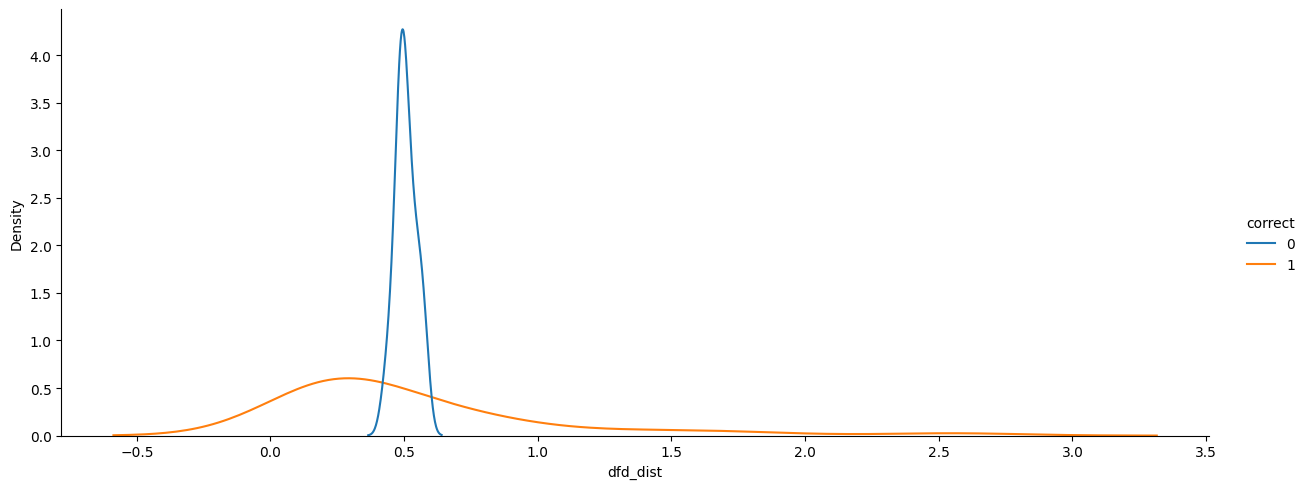

In [38]:
sns_plot = sns.displot(data=pred_df, x="dfd_dist", hue="correct", color='blue', kind="kde", legend=True, height=5, aspect=2.5)